In [11]:
!pip install scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics  import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [14]:
iris=load_iris()

In [15]:
x,y=iris.data,iris.target

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
def train_and_evaluate_model(xtrain,xtest,ytrain,ytest,penalty,title):
    logreg=LogisticRegression(solver='liblinear',multi_class='ovr')
    param_grid={'C':[0.001,0.01,0.1,1,10,100]}
    grid_search=GridSearchCV(logreg,param_grid,cv=5,scoring='accuracy')
    grid_search.fit(xtrain,ytrain)
    best_C=grid_search.best_params_['C']
    best_model=LogisticRegression(C=best_C,penalty=penalty,solver='liblinear',multi_class='ovr')
    best_model.fit(xtrain,ytrain)
    ypred=best_model.predict(xtest)
    accuracy=accuracy_score(ytest,ypred)
    feature_names=iris.feature_names
    plt.figure(figsize=(6,4))
    plt.bar(feature_names,np.abs(best_model.coef_[0]))
    plt.title('Feature Importance')
    plt.xlabel('Feature')
    plt.ylabel('Co efficient importance')
    plt.show()

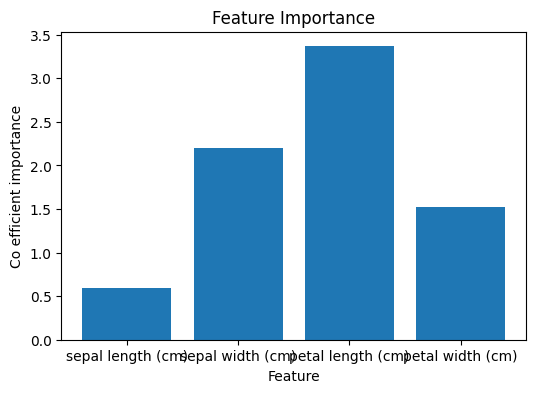

In [19]:
train_and_evaluate_model(xtrain,xtest,ytrain,ytest,penalty='l2',title='L2')